# MYSQL PYTHON PROJECT

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [4]:
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "shabbir#123",
                             database = "ecommerce")
cur = db.cursor()

# List all unique cities where customers are located.

In [7]:
query = """select distinct customer_city from ecommerce.customers"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["City"])

df["City"] = df["City"].str.title()
df.head(10)


,City
0,Franca
1,Sao Bernardo Do Campo
2,Sao Paulo
3,Mogi Das Cruzes
4,Campinas
5,Jaragua Do Sul
6,Timoteo
7,Curitiba
8,Belo Horizonte
9,Montes Claros


# Count the number of orders placed in 2017.

In [5]:
query = """select count(order_id) from ecommerce.orders 
where  year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

"Totals orders are placed in 2017 are",data[0][0]

('Totals orders are placed in 2017 are', 45101)

# Find the total sales per category.

In [5]:
query = """select upper(products.product_category) categories, round(sum(payments.payment_value), 2) sales
from products join order_items on products.product_id = order_items.product_id join payments on payments.order_id = order_items.order_id
group by categories order by sales desc;"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Categories","Sales"])

df

,Categories,Sales
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
...,...,...
69,PC GAMER,2174.43
70,HOUSE COMFORT 2,1710.54
71,CDS MUSIC DVDS,1199.43
72,FASHION CHILDREN'S CLOTHING,785.67


# Calculate the percentage of orders that were paid in installments.

In [6]:
query = """select ((sum(case when payment_installments > 0 then 1 else 0 end)/count(order_id))*100) from payments"""

cur.execute(query)

data = cur.fetchall()

"The percentage of orders that were paid in installments is",data[0][0]

('The percentage of orders that were paid in installments is',
 Decimal('99.9981'))

# Count the number of customers from each state.

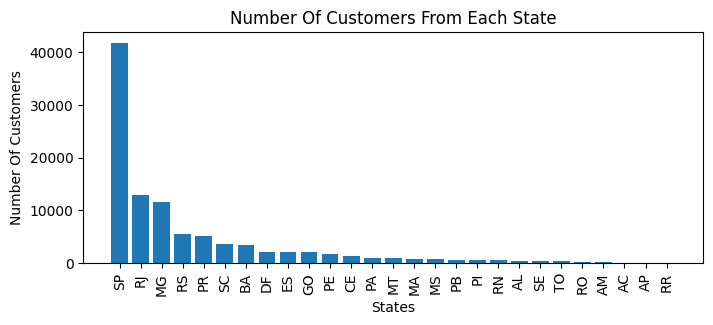

In [7]:
query = """select customer_state,count(customer_id) customers 
from customers 
group by customer_state 
order by customers desc;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["State","Customers"])
df
plt.figure(figsize = (8,3))
plt.bar(df["State"], df["Customers"])
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Number Of Customers")
plt.title("Number Of Customers From Each State")
plt.show()

# Calculate the number of orders per month in 2017 and 2018.

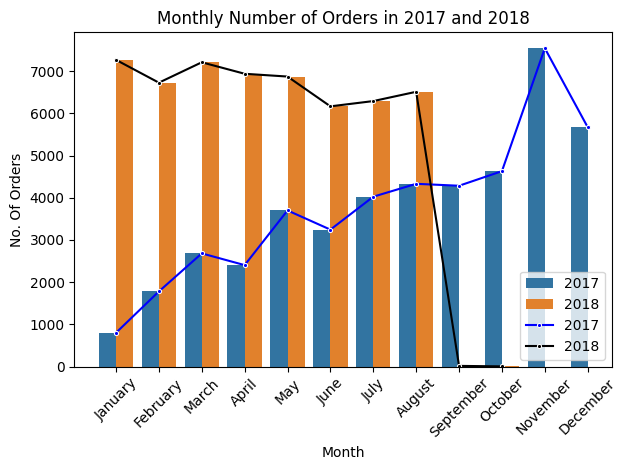

In [8]:
query = """select monthname(order_purchase_timestamp) months, count(order_id) 
from ecommerce.orders 
where  year(order_purchase_timestamp) = 2017 
group by  months;""" 
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Month","No. Of Orders"])
df
month_order = ["January", "February","March","April","May","June","July","August","September","October","November","December"]
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)
df = df.sort_values("Month")

query1 = """select monthname(order_purchase_timestamp) months, count(order_id) 
from ecommerce.orders 
where  year(order_purchase_timestamp) = 2018 
group by  months;"""
cur.execute(query1)
data1 = cur.fetchall()
df1 = pd.DataFrame(data1, columns = ["Month","No. Of Orders"])
df1
month_order1 = ["January", "February","March","April","May","June","July","August","September","October"]
df1["Month"] = pd.Categorical(df1["Month"], categories=month_order1, ordered=True)
df1 = df1.sort_values("Month")

df["Year"] = "2017"
df1["Year"] = "2018"
df2 = pd.concat([df,df1])
sns.barplot(data = df2, x = "Month", y = "No. Of Orders", hue = "Year" )

sns.lineplot(data=df, x="Month", y="No. Of Orders", marker=".", color="blue", label="2017")
sns.lineplot(data=df1, x="Month", y="No. Of Orders", marker=".", color="black", label="2018")
plt.xticks(rotation = 45)
plt.title("Monthly Number of Orders in 2017 and 2018")
plt.legend()
plt.tight_layout()
plt.show()

# Find the average number of products per order, grouped by customer city.

In [9]:
query = """with a as(select customers.customer_city,count(order_items.order_id) as total_products,count(distinct order_items.order_id) as total_orders
from customers join orders on customers.customer_id = orders.customer_id
join order_items on order_items.order_id = orders.order_id
group by customers.customer_city)

select a.customer_city, a.total_products/nullif(a.total_orders, 0) average from a
group by a.customer_city order by average desc;""" 

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ("City", "Avg NO. Of Products Per Order"))
df

,City,Avg NO. Of Products Per Order
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,candido godoi,6.0000
3,datas,6.0000
4,matias olimpio,5.0000
...,...,...
4105,xexeu,1.0000
4106,xique-xique,1.0000
4107,zacarias,1.0000
4108,ze doca,1.0000


# Calculate the percentage of total revenue contributed by each product category.

In [10]:
query = """with a as(select upper(products.product_category) as category,sum(payments.payment_value) as total
from products join order_items on products.product_id = order_items.product_id

join payments on payments.order_id = order_items.order_id

group by category)

select a.category, round((a.total/(select sum(payments.payment_value) from payments))*100, 2) as percent
from a group by a.category order by percent desc;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ("Product Category","Percentage Of Total Revenue Contributed"))
df

,Product Category,Percentage Of Total Revenue Contributed
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [11]:
query = """select products.product_category as category,order_items.price as price,count(order_items.product_id) 
from order_items join products on order_items.product_id = products.product_id
group by category,price;
"""
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ("Product_Category","Price","Order_Count"))
df

arr1 = df["Price"]
arr2 = df["Order_Count"]

cor = np.corrcoef(arr1, arr2)[0, 1] 
print("The correlation is:", cor)

The correlation is: -0.07986190338879844


# Calculate the total revenue generated by each seller, and rank them by revenue.

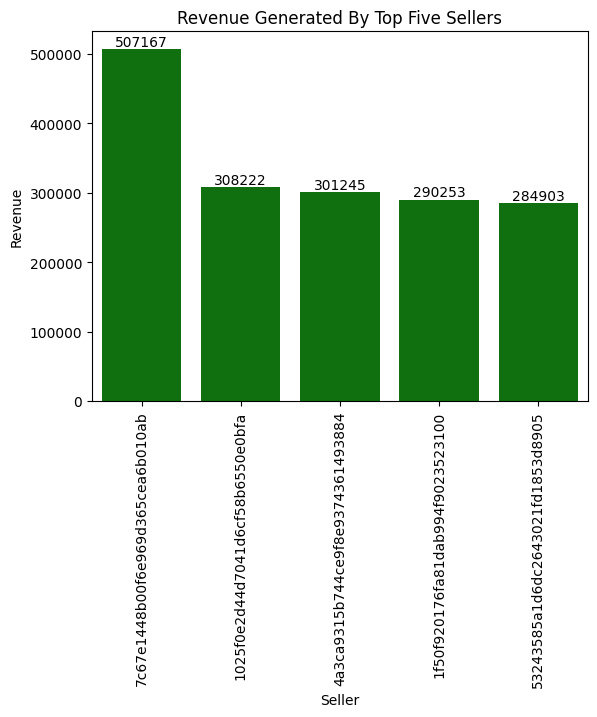

In [3]:
query = """with a as(select order_items.seller_id as seller, round(sum(payments.payment_value), 2) as revenue 
from payments join order_items on payments.order_id = order_items.order_id
group by seller)

select a.seller, a.revenue, dense_rank() over(order by a.revenue desc) from a;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ("Seller","Revenue","Rank"))
df = df.head(5)

a = sns.barplot(data = df, x = df["Seller"], y = df["Revenue"], color = "green")
plt.xticks(rotation = 90)
plt.title("Revenue Generated By Top Five Sellers")
a.bar_label(a.containers[0])
plt.show()
                                    

# Calculate the moving average of order values for each customer over their order history.

In [4]:
query = """select * , avg(a. payments) over(partition by a.Order_id order by Order_Purchase_Timestamp rows between 2 preceding and current row) as Moving_Avg from
(select orders.order_id as Order_id, orders.order_purchase_timestamp as Order_Purchase_Timestamp, payments.payment_value as payments
from orders join payments
on orders.order_id = payments.order_id) as a;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ("Order_id","Order_Purchase_Timestamp","Payments","Moving_Avg"))
df

,Order_id,Order_Purchase_Timestamp,Payments,Moving_Avg
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,72.19,72.190002
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,259.83,259.829987
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,216.87,216.869995
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,25.78,25.780001
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,218.04,218.039993
...,...,...,...,...
103881,fffc94f6ce00a00581880bf54a75a037,2018-04-23 13:57:06,343.40,343.399994
103882,fffcd46ef2263f404302a634eb57f7eb,2018-07-14 10:26:46,386.53,386.529999
103883,fffce4705a9662cd70adb13d4a31832d,2017-10-23 17:07:56,116.85,116.849998
103884,fffe18544ffabc95dfada21779c9644f,2017-08-14 23:02:59,64.71,64.709999


# Calculate the cumulative sales per month for each year.

In [5]:
query = """select *, sum(a.Sales) over(order by a.Year, a.Month) as Camulative_Sum from
(select year(orders.order_purchase_timestamp) as Year,month(orders.order_purchase_timestamp) as Month, round(sum(payments.payment_value), 2) as Sales
from payments join orders 
on payments.order_id = orders.order_id
group by Year ,Month order by Year ,Month) as a;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ("Year","Month","Sales","Camulative_Sum"))
df

,Year,Month,Sales,Camulative_Sum
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [6]:
query = """select *, lag(Sales,1) over(order by Year) as Previous_Yrs_Sales, 
round(((Sales-lag(Sales,1) over(order by Year))/lag(Sales,1) over(order by Year)) * 100, 2) as Year_Over_Year_Growth from

(select year(orders.order_purchase_timestamp) as Year, round(sum(payments.payment_value), 2) as Sales
from payments join orders 
on payments.order_id = orders.order_id
group by Year order by Year) as a;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ("Year","Sales","Previous_Yrs_Sales","Year_Over_Year_Growth"))
df

,Year,Sales,Previous_Yrs_Sales,Year_Over_Year_Growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.7
2,2018,8699763.05,7249746.73,20.0


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [8]:
query = """with a as(select customer_id, min(order_purchase_timestamp) as first_order
from orders
group by customer_id),

b as(select count(distinct a.customer_id) as total_customers,count(distinct orders.customer_id) as repeat_customers
from a join orders
on a.customer_id = orders.customer_id
and orders.order_purchase_timestamp > a.first_order
and orders.order_purchase_timestamp < date_add(a.first_order, interval 6 month))

select (b.repeat_customers / b.total_customers) * 100 as repeat_customer_percentage
from b;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data)
"Because no repeated customers so",df[0][0] 

('Because no repeated customers so', None)

# Identify the top 3 customers who spent the most money in each year.

In [13]:
query1 = """select year(orders.order_purchase_timestamp) as years, payments.order_id, round(sum(payments.payment_value), 2) as payment
from payments join orders
on payments.order_id = orders.order_id
group by payments.order_id,years having years = 2016 order by payment desc limit 3;"""

query2 = """select year(orders.order_purchase_timestamp) as years, payments.order_id, round(sum(payments.payment_value), 2) as payment
from payments join orders
on payments.order_id = orders.order_id
group by payments.order_id,years having years = 2017 order by payment desc limit 3;"""

query3 = """select year(orders.order_purchase_timestamp) as years, payments.order_id, round(sum(payments.payment_value), 2) as payment
from payments join orders
on payments.order_id = orders.order_id
group by payments.order_id,years having years = 2018 order by payment desc limit 3;"""

cur.execute(query1)
data1 = cur.fetchall()

df1 = pd.DataFrame(data1, columns = ("Year","Customer_Id","Payment"))

cur.execute(query2)
data2 = cur.fetchall()

df2 = pd.DataFrame(data2, columns = ("Year","Customer_Id","Payment"))

cur.execute(query3)
data3 = cur.fetchall()

df3 = pd.DataFrame(data3, columns = ("Year","Customer_Id","Payment"))

df4 = pd.concat([df1,df2])

df = pd.concat([df4,df3])
df


,Year,Customer_Id,Payment
0,2016,bc0e0c28cbe995798d3afb7c7c75d269,1423.55
1,2016,dbbbc904081f8e928028432e2e3d7686,1400.74
2,2016,dc18a044b56ed174037ca164cdf2e921,1227.78
0,2017,03caa2c082116e1d31e67e9ae3700499,13664.08
1,2017,0812eb902a67711a1cb742b3cdaa65ae,6929.31
2,2017,f5136e38d1a14a4dbd87dff67da82701,6726.66
0,2018,736e1922ae60d0d6a89247b851902527,7274.88
1,2018,fefacc66af859508bf1a7934eab1e97f,6922.21
2,2018,b4c4b76c642808cbe472a32b86cddc95,4809.44


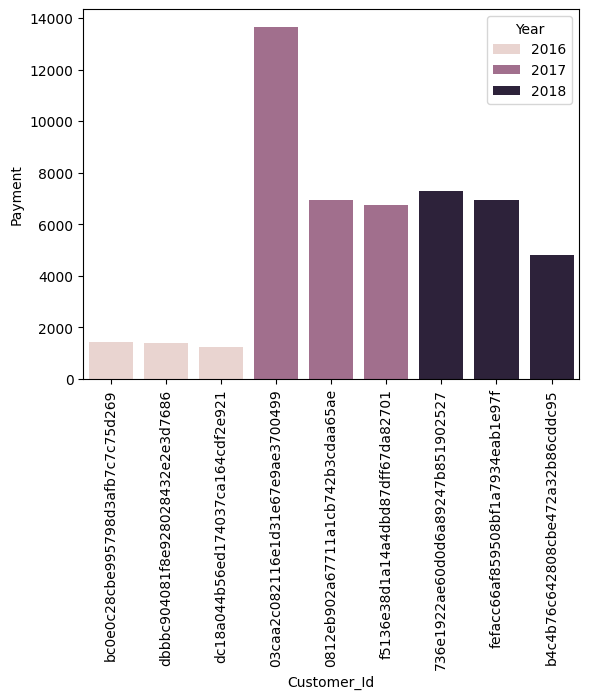

In [16]:
sns.barplot(data = df, x = "Customer_Id", y = "Payment", hue = "Year")
plt.xticks(rotation = 90)
plt.show()

# OR

In [6]:
query = """select years, id, payment from
(select year(orders.order_purchase_timestamp) as years, orders.order_id as id, round(sum(payments.payment_value), 2) as payment
, dense_rank() over(partition by year(orders.order_purchase_timestamp) order by round(sum(payments.payment_value), 2) desc) as d_rank
from orders join payments 
on orders.order_id = payments.order_id
group by id,years ) as a
where d_rank <= 3;"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data)
df


,0,1,2
0,2016,bc0e0c28cbe995798d3afb7c7c75d269,1423.55
1,2016,dbbbc904081f8e928028432e2e3d7686,1400.74
2,2016,dc18a044b56ed174037ca164cdf2e921,1227.78
3,2017,03caa2c082116e1d31e67e9ae3700499,13664.08
4,2017,0812eb902a67711a1cb742b3cdaa65ae,6929.31
5,2017,f5136e38d1a14a4dbd87dff67da82701,6726.66
6,2018,736e1922ae60d0d6a89247b851902527,7274.88
7,2018,fefacc66af859508bf1a7934eab1e97f,6922.21
8,2018,b4c4b76c642808cbe472a32b86cddc95,4809.44
